In [1]:
pip install protobuf==3.20.*

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [2]:
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries to manipulate data
import pandas as pd
import numpy as np

# Library to split data into train and test data
from sklearn.model_selection import train_test_split

# Library to encode the variables
from sklearn import preprocessing


# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 

# library to import different metrics 
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn import metrics
from tensorflow.keras import backend
import tensorflow as tf

# Library to build models in NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Library for GridSearch CV
from sklearn.model_selection import GridSearchCV

# Library for roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# Library for  SMOTE
from imblearn.over_sampling import SMOTE

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library for importing metrics
from sklearn import metrics
import random

#Library for classback API
from keras import callbacks

#display all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

### Load Dataset and Dataset Info 

In [3]:
#load training and testing dataset
train = pd.read_csv("./datasets/Training.csv")
test  = pd.read_csv("./datasets/Testing.csv")

In [4]:
#view first 5 records of training set
train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [5]:
#info on the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
#shape of the test and training set
print("shape of the training set",train.shape)
print("shape of the test set",test.shape)

shape of the training set (4920, 134)
shape of the test set (42, 133)


### Data Pre-Processing

In [7]:
#check for null values in training set
train.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [8]:
#check for NAN values in training set
train.isna().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [9]:
#Remove the unnamed column in training set
train=train.drop(["Unnamed: 133"],axis=1)

In [10]:
#check the shape of the datatset
print("Train data shape",train.shape)
print("Test data shape",test.shape)

Train data shape (4920, 133)
Test data shape (42, 133)


In [11]:
#check  number of uniques values in target variable
train["prognosis"].nunique()

41

In [12]:
#distribution of target variable in training and test set
print("distribution of labels in train set ")
print("*" *50)
print(train["prognosis"].value_counts())
print()
print("distribution of labels in test set")
print("*" *50)
print(test["prognosis"].value_counts())


distribution of labels in train set 
**************************************************
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis

##### Bivariate Analysis on the data

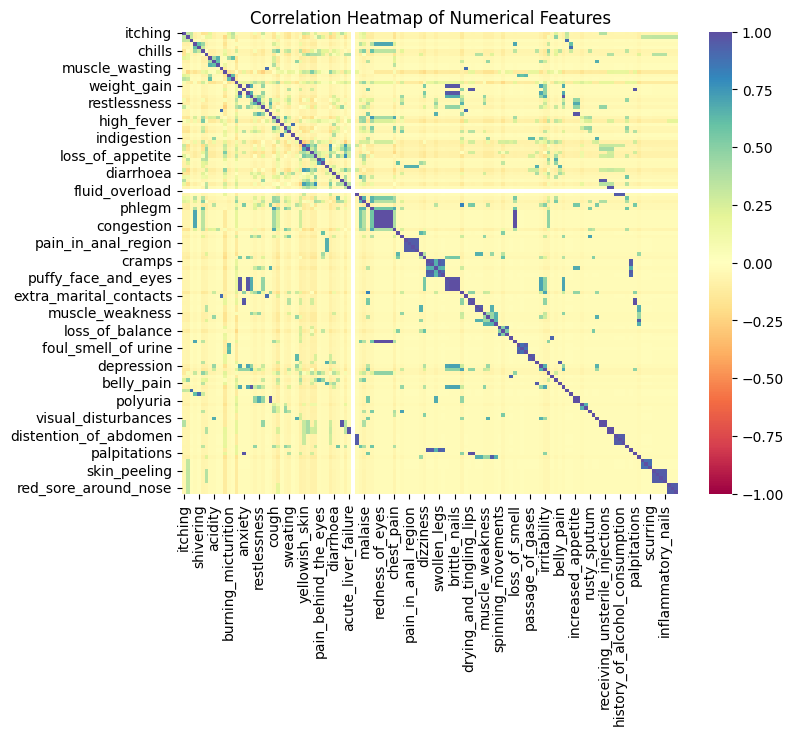

In [13]:
#plot the heatmap 
#plt.figure(figsize=(8, 6))
#sns.heatmap(train.corr(), annot=False, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")        
#plt.show()

numerical_columns = train.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_columns.corr(), annot=False, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [14]:
#correlation matrix on train set
#train.corr()

numerical_columns.corr()

itching  skin_rash  nodal_skin_eruptions  \
itching                         1.000000   0.318158              0.326439   
skin_rash                       0.318158   1.000000              0.298143   
nodal_skin_eruptions            0.326439   0.298143              1.000000   
continuous_sneezing            -0.086906  -0.094786             -0.032566   
shivering                      -0.059893  -0.065324             -0.022444   
chills                         -0.175905  -0.029324             -0.065917   
joint_pain                     -0.160650   0.171134             -0.060200   
stomach_pain                    0.202850   0.161784             -0.032566   
acidity                        -0.086906  -0.094786             -0.032566   
ulcers_on_tongue               -0.059893  -0.065324             -0.022444   
muscle_wasting                 -0.059893  -0.065324             -0.022444   
vomiting                       -0.057763  -0.225046             -0.119543   
burning_micturition             0.207896   0.166507             -0.032103   
spotting_ urination             0.350585   0.298143             -0.022444   
fatigue                         0.069744  -0.105248             -0.120465   
weight_gain                    -0.061573  -0.067156             -0.023073   
anxiety                        -0.061573  -0.067156             -0.023073   
cold_hands_and_feets           -0.061573  -0.067156             -0.023073   
mood_swings                    -0.088129  -0.096120             -0.033025   
weight_loss                     0.091830  -0.139363             -0.047882   
restlessness                   -0.088129  -0.096120             -0.033025   
lethargy                        0.311436   0.067246             -0.047882   
patches_in_throat              -0.059893  -0.065324             -0.022444   
irregular_sugar_level          -0.061573  -0.067156             -0.023073   
cough                          -0.143855  -0.156900             -0.053907   
high_fever                      0.037309   0.117059             -0.092690   
sunken_eyes                    -0.059893  -0.065324             -0.022444   
breathlessness                 -0.126848  -0.138350             -0.047534   
sweating                       -0.159830  -0.174323             -0.059893   
dehydration                    -0.059893  -0.065324             -0.022444   
indigestion                    -0.086906  -0.094786             -0.032566   
headache                       -0.067585   0.053792             -0.081991   
yellowish_skin                  0.300936  -0.207998             -0.071463   
dark_urine                      0.253240  -0.157841             -0.054230   
nausea                         -0.069644  -0.090663             -0.082554   
loss_of_appetite                0.230103   0.049731             -0.082836   
pain_behind_the_eyes           -0.063212   0.341036             -0.023687   
back_pain                      -0.088129   0.204714             -0.033025   
constipation                   -0.088129  -0.096120             -0.033025   
abdominal_pain                  0.263282  -0.224648             -0.077184   
diarrhoea                      -0.143855  -0.156900             -0.053907   
mild_fever                      0.135127   0.110447             -0.041714   
yellow_urine                    0.361723  -0.067156             -0.023073   
yellowing_of_eyes               0.173673  -0.194432             -0.066802   
acute_liver_failure            -0.061573  -0.067156             -0.023073   
fluid_overload                       NaN        NaN                   NaN   
swelling_of_stomach            -0.061573  -0.067156             -0.023073   
swelled_lymph_nodes             0.138099   0.113396             -0.041332   
malaise                         0.221299   0.174242             -0.061117   
blurred_and_distorted_vision   -0.109271  -0.119179             -0.040947   
phlegm                         -0.111317  -0.121411             -0.041714   
throat_irritation            

In [15]:
#correlation matrix 
#corr_matr = train.corr(method='pearson')
corr_matr = numerical_columns.corr(method='pearson')
corr_matr

itching  skin_rash  nodal_skin_eruptions  \
itching                         1.000000   0.318158              0.326439   
skin_rash                       0.318158   1.000000              0.298143   
nodal_skin_eruptions            0.326439   0.298143              1.000000   
continuous_sneezing            -0.086906  -0.094786             -0.032566   
shivering                      -0.059893  -0.065324             -0.022444   
chills                         -0.175905  -0.029324             -0.065917   
joint_pain                     -0.160650   0.171134             -0.060200   
stomach_pain                    0.202850   0.161784             -0.032566   
acidity                        -0.086906  -0.094786             -0.032566   
ulcers_on_tongue               -0.059893  -0.065324             -0.022444   
muscle_wasting                 -0.059893  -0.065324             -0.022444   
vomiting                       -0.057763  -0.225046             -0.119543   
burning_micturition             0.207896   0.166507             -0.032103   
spotting_ urination             0.350585   0.298143             -0.022444   
fatigue                         0.069744  -0.105248             -0.120465   
weight_gain                    -0.061573  -0.067156             -0.023073   
anxiety                        -0.061573  -0.067156             -0.023073   
cold_hands_and_feets           -0.061573  -0.067156             -0.023073   
mood_swings                    -0.088129  -0.096120             -0.033025   
weight_loss                     0.091830  -0.139363             -0.047882   
restlessness                   -0.088129  -0.096120             -0.033025   
lethargy                        0.311436   0.067246             -0.047882   
patches_in_throat              -0.059893  -0.065324             -0.022444   
irregular_sugar_level          -0.061573  -0.067156             -0.023073   
cough                          -0.143855  -0.156900             -0.053907   
high_fever                      0.037309   0.117059             -0.092690   
sunken_eyes                    -0.059893  -0.065324             -0.022444   
breathlessness                 -0.126848  -0.138350             -0.047534   
sweating                       -0.159830  -0.174323             -0.059893   
dehydration                    -0.059893  -0.065324             -0.022444   
indigestion                    -0.086906  -0.094786             -0.032566   
headache                       -0.067585   0.053792             -0.081991   
yellowish_skin                  0.300936  -0.207998             -0.071463   
dark_urine                      0.253240  -0.157841             -0.054230   
nausea                         -0.069644  -0.090663             -0.082554   
loss_of_appetite                0.230103   0.049731             -0.082836   
pain_behind_the_eyes           -0.063212   0.341036             -0.023687   
back_pain                      -0.088129   0.204714             -0.033025   
constipation                   -0.088129  -0.096120             -0.033025   
abdominal_pain                  0.263282  -0.224648             -0.077184   
diarrhoea                      -0.143855  -0.156900             -0.053907   
mild_fever                      0.135127   0.110447             -0.041714   
yellow_urine                    0.361723  -0.067156             -0.023073   
yellowing_of_eyes               0.173673  -0.194432             -0.066802   
acute_liver_failure            -0.061573  -0.067156             -0.023073   
fluid_overload                       NaN        NaN                   NaN   
swelling_of_stomach            -0.061573  -0.067156             -0.023073   
swelled_lymph_nodes             0.138099   0.113396             -0.041332   
malaise                         0.221299   0.174242             -0.061117   
blurred_and_distorted_vision   -0.109271  -0.119179             -0.040947   
phlegm                         -0.111317  -0.121411             -0.041714   
throat_irritation            

In [16]:
# use only the upper tringle of correlation matrix and change the values of lower coorealtion matrix to bool
upper_corr_matrix=corr_matr.where(np.triu(np.ones(corr_matr.shape),k=1).astype(bool))
upper_corr_matrix                                    

itching  skin_rash  nodal_skin_eruptions  \
itching                             NaN   0.318158              0.326439   
skin_rash                           NaN        NaN              0.298143   
nodal_skin_eruptions                NaN        NaN                   NaN   
continuous_sneezing                 NaN        NaN                   NaN   
shivering                           NaN        NaN                   NaN   
chills                              NaN        NaN                   NaN   
joint_pain                          NaN        NaN                   NaN   
stomach_pain                        NaN        NaN                   NaN   
acidity                             NaN        NaN                   NaN   
ulcers_on_tongue                    NaN        NaN                   NaN   
muscle_wasting                      NaN        NaN                   NaN   
vomiting                            NaN        NaN                   NaN   
burning_micturition                 NaN        NaN                   NaN   
spotting_ urination                 NaN        NaN                   NaN   
fatigue                             NaN        NaN                   NaN   
weight_gain                         NaN        NaN                   NaN   
anxiety                             NaN        NaN                   NaN   
cold_hands_and_feets                NaN        NaN                   NaN   
mood_swings                         NaN        NaN                   NaN   
weight_loss                         NaN        NaN                   NaN   
restlessness                        NaN        NaN                   NaN   
lethargy                            NaN        NaN                   NaN   
patches_in_throat                   NaN        NaN                   NaN   
irregular_sugar_level               NaN        NaN                   NaN   
cough                               NaN        NaN                   NaN   
high_fever                          NaN        NaN                   NaN   
sunken_eyes                         NaN        NaN                   NaN   
breathlessness                      NaN        NaN                   NaN   
sweating                            NaN        NaN                   NaN   
dehydration                         NaN        NaN                   NaN   
indigestion                         NaN        NaN                   NaN   
headache                            NaN        NaN                   NaN   
yellowish_skin                      NaN        NaN                   NaN   
dark_urine                          NaN        NaN                   NaN   
nausea                              NaN        NaN                   NaN   
loss_of_appetite                    NaN        NaN                   NaN   
pain_behind_the_eyes                NaN        NaN                   NaN   
back_pain                           NaN        NaN                   NaN   
constipation                        NaN        NaN                   NaN   
abdominal_pain                      NaN        NaN                   NaN   
diarrhoea                           NaN        NaN                   NaN   
mild_fever                          NaN        NaN                   NaN   
yellow_urine                        NaN        NaN                   NaN   
yellowing_of_eyes                   NaN        NaN                   NaN   
acute_liver_failure                 NaN        NaN                   NaN   
fluid_overload                      NaN        NaN                   NaN   
swelling_of_stomach                 NaN        NaN                   NaN   
swelled_lymph_nodes                 NaN        NaN                   NaN   
malaise                             NaN        NaN                   NaN   
blurred_and_distorted_vision        NaN        NaN                   NaN   
phlegm                              NaN        NaN                   NaN   
throat_irritation                   NaN        NaN                   NaN   
redn

In [17]:
#view correlation pairs
corr_pairs = upper_corr_matrix.unstack().dropna()
sorted_mat = corr_pairs.sort_values() 
print(sorted_mat) 

yellowish_skin                  headache                         -0.261066
lethargy                        vomiting                         -0.255033
yellowing_of_eyes               headache                         -0.244038
vomiting                        skin_rash                        -0.225046
abdominal_pain                  skin_rash                        -0.224648
chest_pain                      nausea                           -0.223684
loss_of_balance                 fatigue                          -0.219780
dizziness                       vomiting                         -0.216035
yellowish_skin                  chills                           -0.209885
chest_pain                      abdominal_pain                   -0.209131
yellowish_skin                  skin_rash                        -0.207998
abdominal_pain                  sweating                         -0.205971
irritability                    high_fever                       -0.202018
excessive_hunger         

##### Feature Engineering / Feature Selection

In [18]:
# drop columns with higher correlation
drop_cols= [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > 0.9)]
train2 = train.drop(drop_cols, axis=1)
test2 = test.drop(drop_cols, axis=1)
print("Columns to drop",drop_cols)
print("Count of columns to drop",len(drop_cols))

Columns to drop ['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']
Count of columns to drop 42


In [19]:
#shape of dataset after feature selection
print("shape of training dataset after dropping cols",train2.shape)
print("shape of test dataset after dropping cols",test2.shape)

shape of training dataset after dropping cols (4920, 91)
shape of test dataset after dropping cols (42, 91)


In [20]:
# encode categorical values to numeric 
label_encoder = LabelEncoder() 
train2["prognosis"] = label_encoder.fit_transform(train2['prognosis']) 
#uncomment the below code and run to see the mapping dictionary
#label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
test2["prognosis"] = label_encoder.transform(test2["prognosis"])

In [21]:
#creating checkpoints to store intermediate results
train2_copy=train2.copy()
test2_copy=test2.copy()

### Building the Model 

In [22]:
# Splitting the dataset into the Temp and Train set
#X_train, X_temp, y_train, y_temp = train_test_split(train2_copy.drop("prognosis",1),train2_copy["prognosis"], test_size = 0.1, random_state = 42,stratify=train2_copy["prognosis"],shuffle = True)
X_train, X_temp, y_train, y_temp = train_test_split(train2_copy.drop(columns=["prognosis"]),
                                                    train2_copy["prognosis"],
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=train2_copy["prognosis"],
                                                    shuffle=True)





In [23]:
#concat x_temp to test2_copy
X_test = pd.concat([test2_copy,pd.concat([X_temp,y_temp],axis=1)],axis=0)

In [24]:
#shape of training and test set
print("shape of training dataset after dropping cols",X_train.shape)
print("shape of test dataset after dropping cols",X_test.shape)

shape of training dataset after dropping cols (4428, 90)
shape of test dataset after dropping cols (534, 91)


##### Neural Network 

In [25]:
y_train_dum = pd.get_dummies(y_train)

In [26]:
#Model initilaization 
nn_model = Sequential()

#This adds the input layer (by specifying input dimension)
nn_model.add(Dense(activation = "relu", input_dim = X_train.shape[1],units=64))
# Add 1st hidden layer
nn_model.add(Dense(32, activation = "relu"))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(16, activation = "relu"))
nn_model.add(Dropout(0.2))

# Add last layer
nn_model.add(Dense(y_train_dum.shape[1], activation = "softmax"))

# Create optimizer with default learning rate
# Compile the model
nn_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
nn_model.summary()

nn_history = nn_model.fit(X_train, y_train_dum, epochs = 10 , batch_size=32)

print("Neural Network  Train accurcay score with ",format(nn_history.history['accuracy'][-1]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5824      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 41)                697       
                                                                 
Total params: 9,129
Trainable params: 9,129
Non-trainabl

In [27]:
# prediction on test set
y_pred = nn_model.predict(X_test.iloc[:,:-1])

y_pred = [np.argmax(i) for i in y_pred ]

print("Neural Network Test accuracy with ",format(accuracy_score(X_test['prognosis'], y_pred)*100),'%')

17/17 [==============================] - 0s 2ms/step
Neural Network Test accuracy with  100.0 %


In [28]:
print(classification_report( X_test['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00        13
          17       1.00    

Text(0.5, 885.5555555555555, 'Predicted label')

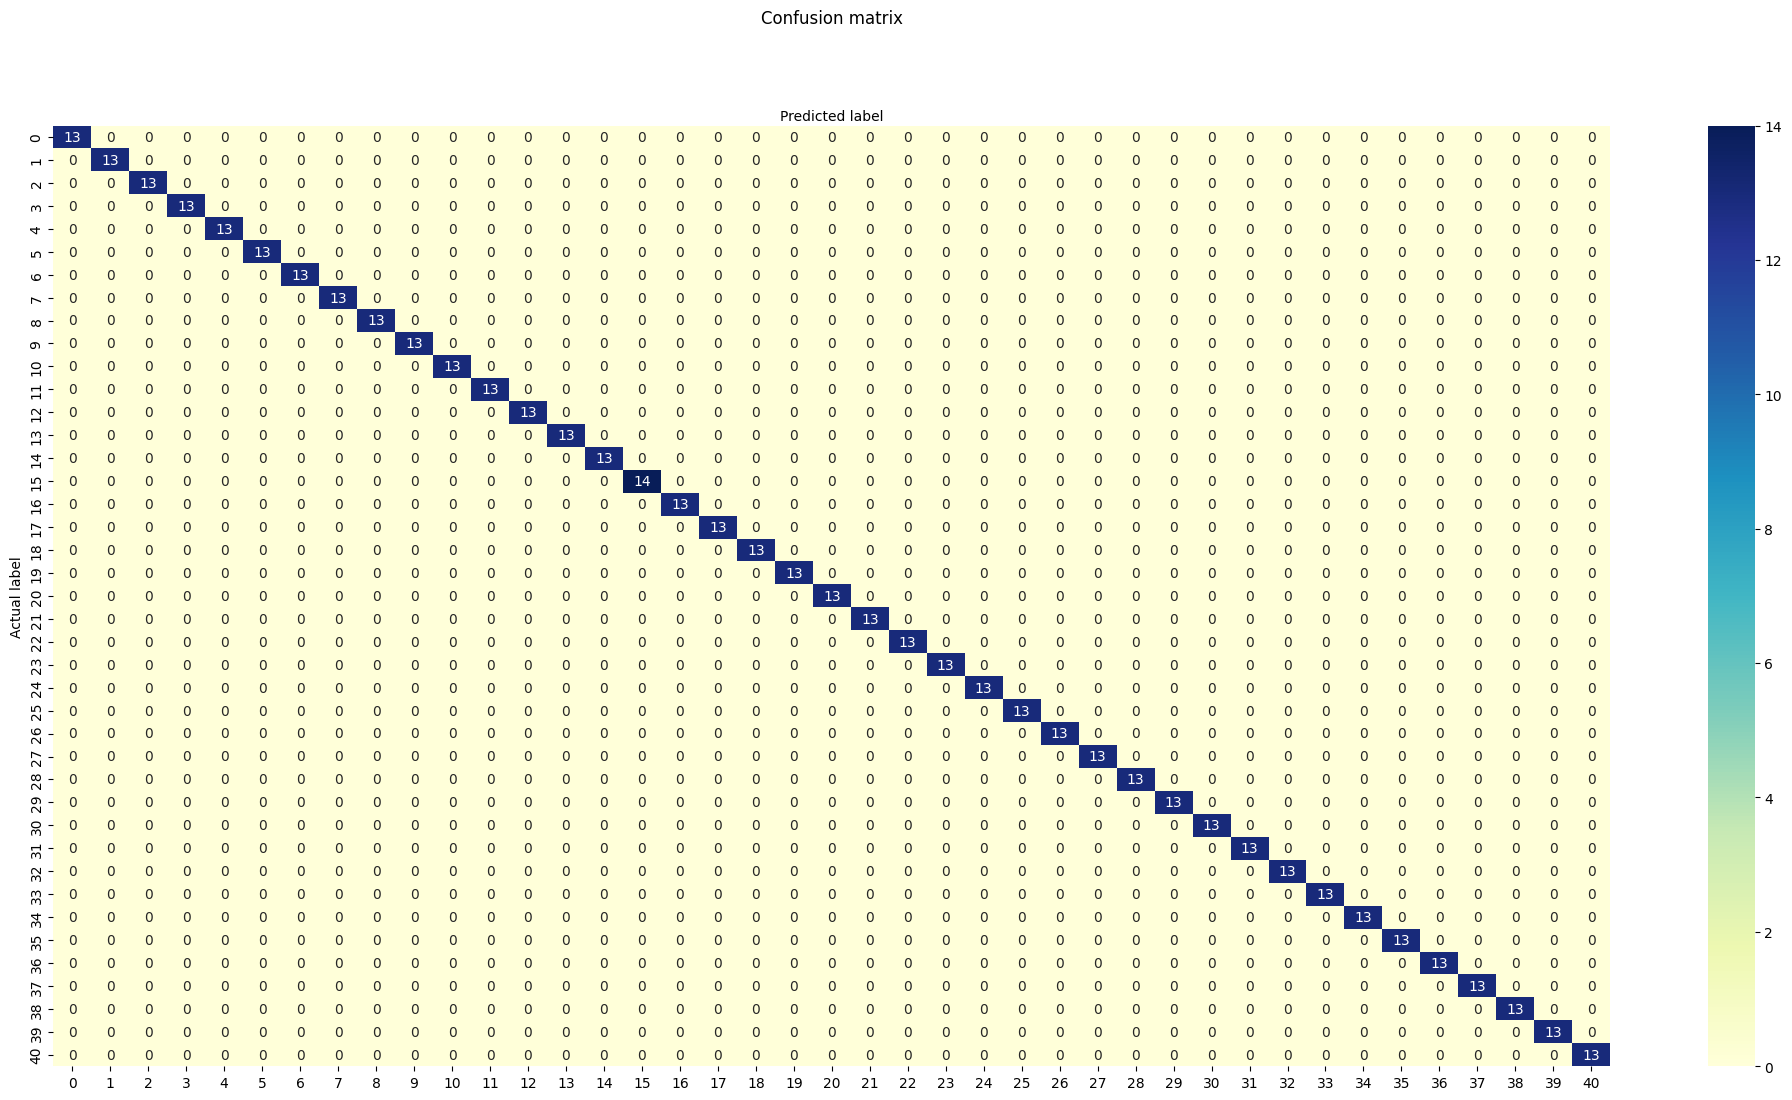

In [29]:
class_names=label_encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(X_test['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
#y_train()
print(y_train)  
mean_value = y_train.mean()


1136    26
4279    29
4579    13
870     33
4601     6
1049    21
790     38
125      7
4604     7
4052    31
4674    15
2901    26
4385    35
2995    16
1396     8
3843    39
581     11
3386     3
2049    27
3498    32
17       4
958     32
1989    31
768      5
2087     9
902     17
1171     5
3429    10
2399    31
4538    13
2974    21
1501    34
1262     9
98       6
4789    25
3904     6
2613    39
4126    10
1944    39
209     19
4654    20
459     14
3356     5
69       1
1213    35
156     29
3198    15
3037     9
4207    36
3119     9
4744    18
2033    35
4216    31
3308    13
2170     7
1787    28
1193     2
3360    35
4067    17
2709     9
3944    17
3687    38
4342     2
1419    37
2419     0
2704    35
364      0
3138    21
2453    27
1152    25
855      9
3953    11
1586     5
3467    22
698     13
2687    21
1377    28
3916    20
4561    23
4782    10
2366    26
1390     8
3690    15
747     25
568     29
1936    18
1794    29
2405     5
4351    33
82      17
4128    13

In [31]:
import pickle

pkl_filename = 'model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(nn_model, file)


In [32]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    print(pickle_model)

In [33]:
#Does not work as predict_mpg function does not exist
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_mpg(config, model)
predictValue

NameError: name 'predict_mpg' is not defined